# Public health research with python

 The role of the Food and Agriculture Organization of the United Nations (FAO) is “to help build a world free from hunger”.
 
 <br></br>

 
 My mission is to carry out a large-scale study on the subject of sub-nutrition in the world.
 
 <br></br>
 
 
<u> Method</u> :
 
 1. Explore and clean <a href="https://github.com/donia-nefiz/Public-health-research-with-python/tree/main/FAO%20data" target="_blank">FAO datas</a> available on <a href="https://www.fao.org/faostat/fr/#data" target="_blank">fao.org</a>
     <br>*a. [undernutrition.csv](http://localhost:8888/edit/undernutrition.csv) : exploration and data cleaning [(here)](#another_cell_a)*</br>
     <br>*b. [population.csv](http://localhost:8888/edit/population.csv) : exploration and data cleaning [(here)](#another_cell_b)*</br>
     <br>*c. [food_help.csv](http://localhost:8888/edit/food_help.csv) : exploration and data cleaning [(here)](#another_cell_c)*</br>
     <br>*d. [food_availability.csv](http://localhost:8888/edit/food_availability.csv) : exploration and data cleaning [(here)](#another_cell_d)*</br>


2. The State of Food Security and Nutrition in the World in 2017
     <br>*a. Proportion of people undernourished in 2017 [(here)](#another_cell_2_a)*</br>
     <br>*b. Theoretical number of people who could be fed in the world in 2017 [(here)](#another_cell_2_b)*</br>
     <br>*c. Theoretical number of people who could be fed in the world in 2017 (only with vegetables) [(here)](#another_cell_2_c)*</br>
     <br>*d. Use of domestic availibility [(here)](#another_cell_2_d)*</br>
     <br>*e. Use of domestic grain availability [(here)](#another_cell_2_e)*</br>


**FAO data, files exploration and data cleaning**

In [1]:
import pandas as pd

In [2]:
import numpy as np

  <a id='another_cell_a'></a>

*a. [undernutrition.csv](http://localhost:8888/edit/undernutrition.csv) : exploration and data cleaning*

- Loading file:

In [3]:
undernutrition = pd.read_csv('undernutrition.csv', sep=';')

- First 5 rows display :

In [4]:
undernutrition.head()

,Zone,Année,Valeur (en million d'hab)
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


- Number of rows and columns :

In [5]:
undernutrition.shape

(1218, 3)

- .dtypes display :

In [6]:
undernutrition.dtypes

Zone                         object
Année                        object
Valeur (en million d'hab)    object
dtype: object

- "Valeur" column .unique values display :

In [7]:
undernutrition["Valeur (en million d'hab)"].unique()

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '

- Update "Valeur" column to numeric :

In [8]:
undernutrition["Valeur (en million d'hab)"] = pd.to_numeric(undernutrition["Valeur (en million d'hab)"],errors = 'coerce')

- .dtypes display :

In [9]:
undernutrition.dtypes

Zone                          object
Année                         object
Valeur (en million d'hab)    float64
dtype: object

- "Valeur" column display :

In [10]:
undernutrition["Valeur (en million d'hab)"]

0        8.6
1        8.8
2        8.9
3        9.7
4       10.5
        ... 
1213     NaN
1214     NaN
1215     NaN
1216     NaN
1217     NaN
Name: Valeur (en million d'hab), Length: 1218, dtype: float64

- Replace NaN values by 0.00 :

In [11]:
undernutrition["Valeur (en million d'hab)"].fillna(0, inplace=True)

In [12]:
undernutrition["Valeur (en million d'hab)"]

0        8.6
1        8.8
2        8.9
3        9.7
4       10.5
        ... 
1213     0.0
1214     0.0
1215     0.0
1216     0.0
1217     0.0
Name: Valeur (en million d'hab), Length: 1218, dtype: float64

- Update "Année" column values :

In [13]:
undernutrition = undernutrition.replace(["2012-2014","2013-2015","2014-2016","2015-2017","2016-2018","2017-2019"],
                                        ["2013","2014","2015","2016","2017","2018"])

In [14]:
print(undernutrition)

             Zone Année  Valeur (en million d'hab)
0     Afghanistan  2013                        8.6
1     Afghanistan  2014                        8.8
2     Afghanistan  2015                        8.9
3     Afghanistan  2016                        9.7
4     Afghanistan  2017                       10.5
...           ...   ...                        ...
1213     Zimbabwe  2014                        0.0
1214     Zimbabwe  2015                        0.0
1215     Zimbabwe  2016                        0.0
1216     Zimbabwe  2017                        0.0
1217     Zimbabwe  2018                        0.0

[1218 rows x 3 columns]


- Convert "Valeur" column values in thousands of inhabitants :

In [15]:
undernutrition["Valeur (en milliers d'hab)"] = undernutrition["Valeur (en million d'hab)"] * 1000

In [16]:
undernutrition.head()

,Zone,Année,Valeur (en million d'hab),Valeur (en milliers d'hab)
0,Afghanistan,2013,8.6,8600.0
1,Afghanistan,2014,8.8,8800.0
2,Afghanistan,2015,8.9,8900.0
3,Afghanistan,2016,9.7,9700.0
4,Afghanistan,2017,10.5,10500.0


- Convert "Valeur (en milliers d'hab)" column to integer :

In [17]:
undernutrition = undernutrition.astype({"Valeur (en milliers d'hab)": int})

In [18]:
undernutrition.head()

,Zone,Année,Valeur (en million d'hab),Valeur (en milliers d'hab)
0,Afghanistan,2013,8.6,8600
1,Afghanistan,2014,8.8,8800
2,Afghanistan,2015,8.9,8900
3,Afghanistan,2016,9.7,9700
4,Afghanistan,2017,10.5,10500


- New df on 2017:

In [19]:
undernutrition2017 = undernutrition.loc[undernutrition["Année"].isin(["2017"])].copy()

In [20]:
undernutrition2017.head()

,Zone,Année,Valeur (en million d'hab),Valeur (en milliers d'hab)
4,Afghanistan,2017,10.5,10500
10,Afrique du Sud,2017,3.1,3100
16,Albanie,2017,0.1,100
22,Algérie,2017,1.3,1300
28,Allemagne,2017,0.0,0


 <a id='another_cell_b'></a>


*b. [population.csv](http://localhost:8888/edit/population.csv) : exploration and data cleaning*

- Loading file:

In [21]:
population = pd.read_csv('population.csv', sep=';')

- First 5 rows display :

In [22]:
population.head()

,Zone,Année,Valeur (en milliers d'hab)
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


- Number of rows and columns :

In [23]:
population.shape

(1416, 3)

- .dtypes display :

In [24]:
population.dtypes

Zone                           object
Année                           int64
Valeur (en milliers d'hab)    float64
dtype: object

- Convert "Valeur" column values to million of inhabitants :

In [25]:
population["Valeur (en million d'hab)"] = population["Valeur (en milliers d'hab)"] / 1000

In [26]:
population["Population totale"] = population["Valeur (en milliers d'hab)"] * 1000

In [27]:
population.head()

,Zone,Année,Valeur (en milliers d'hab),Valeur (en million d'hab),Population totale
0,Afghanistan,2013,32269.589,32.269589,32269589.0
1,Afghanistan,2014,33370.794,33.370794,33370794.0
2,Afghanistan,2015,34413.603,34.413603,34413603.0
3,Afghanistan,2016,35383.032,35.383032,35383032.0
4,Afghanistan,2017,36296.113,36.296113,36296113.0


- population 2017 new df :

In [28]:
pop2017 = population.loc[population["Année"].isin([2017])].copy()

In [29]:
pop2017.head()

,Zone,Année,Valeur (en milliers d'hab),Valeur (en million d'hab),Population totale
4,Afghanistan,2017,36296.113,36.296113,36296113.0
10,Afrique du Sud,2017,57009.756,57.009756,57009756.0
16,Albanie,2017,2884.169,2.884169,2884169.0
22,Algérie,2017,41389.189,41.389189,41389189.0
28,Allemagne,2017,82658.409,82.658409,82658409.0


In [30]:
pop2017.rename(columns = {"Valeur (en milliers d'hab)": "Population (en milliers d'hab)",
                          "Valeur (en million d'hab)": "Population (en million d'hab)",
                         "Année": "2017"}, inplace=True)

In [31]:
pop2017.head()

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale
4,Afghanistan,2017,36296.113,36.296113,36296113.0
10,Afrique du Sud,2017,57009.756,57.009756,57009756.0
16,Albanie,2017,2884.169,2.884169,2884169.0
22,Algérie,2017,41389.189,41.389189,41389189.0
28,Allemagne,2017,82658.409,82.658409,82658409.0


In [32]:
pop2017.shape

(236, 5)

  <a id='another_cell_c'></a>

*c. [food_help.csv](http://localhost:8888/edit/food_help.csv) : exploration and data cleaning*


- Loading file:

In [33]:
foodHelp = pd.read_csv('food_help.csv', sep=';')

- First 5 rows display :

In [34]:
foodHelp.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


- Number of rows and columns :

In [35]:
foodHelp.shape

(1475, 4)

- .dtypes display :

In [36]:
foodHelp.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

- Rename "Valeur" column by "Valeur (en tonnes)" :

In [37]:
foodHelp.rename(columns = {'Valeur': 'Valeur (en tonnes)'}, inplace=True)

In [38]:
print(foodHelp)

     Pays bénéficiaire  Année                   Produit  Valeur (en tonnes)
0          Afghanistan   2013       Autres non-céréales                 682
1          Afghanistan   2014       Autres non-céréales                 335
2          Afghanistan   2013              Blé et Farin               39224
3          Afghanistan   2014              Blé et Farin               15160
4          Afghanistan   2013                  Céréales               40504
...                ...    ...                       ...                 ...
1470          Zimbabwe   2015  Mélanges et préparations                  96
1471          Zimbabwe   2013              Non-céréales                5022
1472          Zimbabwe   2014              Non-céréales                2310
1473          Zimbabwe   2015              Non-céréales                 306
1474          Zimbabwe   2013                Riz, total                  64

[1475 rows x 4 columns]


 <a id='another_cell_d'></a>

*d. [food_availability.csv](http://localhost:8888/edit/food_availability.csv) : exploration and data cleaning*

- Loading file:

In [39]:
foodAvailability = pd.read_csv('food_availability.csv', sep=';')

- First 5 rows display :

In [40]:
foodAvailability.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


- Number of rows and columns :

In [41]:
foodAvailability.shape

(15605, 18)

- Replace NaN values by 0.00 :

In [42]:
foodAvailability.fillna(0, inplace=True)

- foodAvailability dataframe display :

In [43]:
foodAvailability.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


- .dtypes display :

In [44]:
foodAvailability.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

- Convert use of food availability columns in "kilogram" :

In [45]:
Convert1 = ["Aliments pour animaux",
            "Autres Utilisations",
            "Disponibilité intérieure",
            "Exportations - Quantité",
            "Importations - Quantité",
            "Nourriture",
            "Pertes",
            "Production",
            "Semences",
            "Traitement",
            "Variation de stock"]

for columns in Convert1 :
    foodAvailability[columns]*= 1000000

In [46]:
foodAvailability.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


- Rename use of food availability columns by adding "(en kg)" :

In [47]:
foodAvailability.rename(columns = {'Nourriture': 'Nourriture (en kg)','Pertes': 'Pertes (en kg)','Aliments pour animaux': 'Aliments pour animaux (en kg)','Autres Utilisations': 'Autres Utilisations (en kg)','Disponibilité intérieure': 'Disponibilité intérieure (en kg)','Exportations - Quantité': 'Exportations - Quantité (en kg)','Importations - Quantité': 'Importations - Quantité (en kg)','Nourriture (en kg)': 'Nourriture (en kg)','Pertes': 'Pertes (en kg)','Production': 'Production (en kg)','Semences': 'Semences (en kg)','Traitement': 'Traitement (en kg)','Variation de stock': 'Variation de stock (en kg)'}) 

,Zone,Produit,Origine,Aliments pour animaux (en kg),Autres Utilisations (en kg),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (en kg),Exportations - Quantité (en kg),Importations - Quantité (en kg),Nourriture (en kg),Pertes (en kg),Production (en kg),Semences (en kg),Traitement (en kg),Variation de stock (en kg)
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 <a id='another_cell_2_a'></a>

**The State of Food Security and Nutrition in the World 2017**

*a. Proportion of people undernourished in 2017*

- DataFrames display :

In [48]:
undernutrition2017

,Zone,Année,Valeur (en million d'hab),Valeur (en milliers d'hab)
4,Afghanistan,2017,10.5,10500
10,Afrique du Sud,2017,3.1,3100
16,Albanie,2017,0.1,100
22,Algérie,2017,1.3,1300
28,Allemagne,2017,0.0,0
...,...,...,...,...
1192,Venezuela (République bolivarienne du),2017,8.0,8000
1198,Viet Nam,2017,6.5,6500
1204,Yémen,2017,0.0,0
1210,Zambie,2017,0.0,0


- Merge DataFrames :

In [161]:
proportionUndernutrition = pop2017.merge(undernutrition2017, on="Zone", how="inner")

In [162]:
proportionUndernutrition

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale,Année,Valeur (en million d'hab),Valeur (en milliers d'hab)
0,Afghanistan,2017,36296.113,36.296113,36296113.0,2017,10.5,10500
1,Afrique du Sud,2017,57009.756,57.009756,57009756.0,2017,3.1,3100
2,Albanie,2017,2884.169,2.884169,2884169.0,2017,0.1,100
3,Algérie,2017,41389.189,41.389189,41389189.0,2017,1.3,1300
4,Allemagne,2017,82658.409,82.658409,82658409.0,2017,0.0,0
...,...,...,...,...,...,...,...,...
196,Venezuela (République bolivarienne du),2017,29402.484,29.402484,29402484.0,2017,8.0,8000
197,Viet Nam,2017,94600.648,94.600648,94600648.0,2017,6.5,6500
198,Yémen,2017,27834.819,27.834819,27834819.0,2017,0.0,0
199,Zambie,2017,16853.599,16.853599,16853599.0,2017,0.0,0


- Replace N/A with 0 and check :

In [163]:
proportionUndernutrition.fillna(0, inplace=True)

- Create a new df only with columns 0, 2 and 6 :

In [164]:
proportionUndernutrition_final = proportionUndernutrition.iloc[0:237, [0,2,7]]

In [165]:
proportionUndernutrition_final

,Zone,Population (en milliers d'hab),Valeur (en milliers d'hab)
0,Afghanistan,36296.113,10500
1,Afrique du Sud,57009.756,3100
2,Albanie,2884.169,100
3,Algérie,41389.189,1300
4,Allemagne,82658.409,0
...,...,...,...
196,Venezuela (République bolivarienne du),29402.484,8000
197,Viet Nam,94600.648,6500
198,Yémen,27834.819,0
199,Zambie,16853.599,0


- Sum the column "Valeur (en milliers d'hab)" :

In [166]:
undernutrition_sum = proportionUndernutrition_final["Valeur (en milliers d'hab)"].sum()

- Sum the column "Population (en milliers d'hab)" :

In [167]:
population_sum = proportionUndernutrition_final["Population (en milliers d'hab)"].sum()

- Final result :

In [179]:
print("The proportion of people in a state of undernutrition in the world in 2017 was about", round(undernutrition_sum / population_sum * 100, 2), "%")

The proportion of people in a state of undernutrition in the world in 2017 was about 7.17 %


<a id='another_cell_2_b'></a>

*b. Theoretical number of people who could be fed in the world in 2017*

- Df foodAvailability display :

In [57]:
foodAvailability.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


- Creation new df only on 2 columns :

In [58]:
foodAvailibilityKcal = foodAvailability[{'Zone','Disponibilité alimentaire (Kcal/personne/jour)'}]

In [59]:
foodAvailibilityKcal.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,5.0
1,Afghanistan,1.0
2,Afghanistan,1.0
3,Afghanistan,0.0
4,Afghanistan,4.0


- Creation new df foodAvailibilityKcal group by "Zone" :

In [60]:
foodAvailibilityKcalGroupByZone = foodAvailibilityKcal.groupby(by="Zone").sum()

In [61]:
foodAvailibilityKcalGroupByZone = foodAvailibilityKcalGroupByZone.astype({"Disponibilité alimentaire (Kcal/personne/jour)": int})

In [62]:
foodAvailibilityKcalGroupByZone.head()

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087
Afrique du Sud,3020
Albanie,3188
Algérie,3293
Allemagne,3503


- Df pop2017 display :

In [63]:
pop2017.head()

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale
4,Afghanistan,2017,36296.113,36.296113,36296113.0
10,Afrique du Sud,2017,57009.756,57.009756,57009756.0
16,Albanie,2017,2884.169,2.884169,2884169.0
22,Algérie,2017,41389.189,41.389189,41389189.0
28,Allemagne,2017,82658.409,82.658409,82658409.0


- Creation new df (merged "pop2017" and "foodAvailibilityKcalGroupByZone") :

In [64]:
foodAvailibility_Total = pop2017.merge(foodAvailibilityKcalGroupByZone, on="Zone", how="inner")

In [65]:
foodAvailibility_Total

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,36.296113,36296113.0,2087
1,Afrique du Sud,2017,57009.756,57.009756,57009756.0,3020
2,Albanie,2017,2884.169,2.884169,2884169.0,3188
3,Algérie,2017,41389.189,41.389189,41389189.0,3293
4,Allemagne,2017,82658.409,82.658409,82658409.0,3503
...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,29.402484,29402484.0,2633
168,Viet Nam,2017,94600.648,94.600648,94600648.0,2744
169,Yémen,2017,27834.819,27.834819,27834819.0,2217
170,Zambie,2017,16853.599,16.853599,16853599.0,1924


- Align pop2017 "Zone" column values with those of foodAvailibilityKcalGroupByZone df :

In [66]:
pop2017 = pop2017.replace("Royaume-Uni de Grande-Bretagne et d'Irlande du Nord","Royaume-Uni")

In [67]:
pop2017 = pop2017.replace("Tchéquie","Tchéquie (la)")

In [68]:
pop2017.iloc[185:186]

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale
1114,Royaume-Uni,2017,66727.461,66.727461,66727461.0


In [69]:
pop2017.iloc[217:218]

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale
1306,Tchéquie (la),2017,10641.034,10.641034,10641034.0


- Run new df (merged "pop2017" and "foodAvailibilityKcalGroupByZone") :

In [70]:
foodAvailibility_Total = pop2017.merge(foodAvailibilityKcalGroupByZone, on="Zone", how="inner")

In [71]:
foodAvailibility_Total.shape

(174, 6)

- China population checking in the df :

In [72]:
foodAvailibility_Total.iloc[33:37]

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale,Disponibilité alimentaire (Kcal/personne/jour)
33,Chine - RAS de Hong-Kong,2017,7306.322,7.306322,7.306322e+06,3286
34,Chine - RAS de Macao,2017,622.585,0.622585,6.225850e+05,2915
35,Chine (continentale),2017,1421021.791,1421.021791,1.421022e+09,3112
36,Chine (Taiwan Province de),2017,23674.546,23.674546,2.367455e+07,2987


- Create new df foodAvailibility_Total_final (only on 3 columns) :

In [73]:
foodAvailibility_Total_final = foodAvailibility_Total.iloc[0:175, [0,4,5]]

In [74]:
foodAvailibility_Total_final

,Zone,Population totale,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,36296113.0,2087
1,Afrique du Sud,57009756.0,3020
2,Albanie,2884169.0,3188
3,Algérie,41389189.0,3293
4,Allemagne,82658409.0,3503
...,...,...,...
169,Venezuela (République bolivarienne du),29402484.0,2633
170,Viet Nam,94600648.0,2744
171,Yémen,27834819.0,2217
172,Zambie,16853599.0,1924


- Final result and global coverage (%) :

In [75]:
foodAvailibility_Total_final["Disponibilité alimentaire (Kcal/Pays/jour)"] = foodAvailibility_Total_final["Population totale"] * foodAvailibility_Total_final["Disponibilité alimentaire (Kcal/personne/jour)"]

In [76]:
foodAvailibility_Total_final

,Zone,Population totale,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire (Kcal/Pays/jour)
0,Afghanistan,36296113.0,2087,7.574999e+10
1,Afrique du Sud,57009756.0,3020,1.721695e+11
2,Albanie,2884169.0,3188,9.194731e+09
3,Algérie,41389189.0,3293,1.362946e+11
4,Allemagne,82658409.0,3503,2.895524e+11
...,...,...,...,...
169,Venezuela (République bolivarienne du),29402484.0,2633,7.741674e+10
170,Viet Nam,94600648.0,2744,2.595842e+11
171,Yémen,27834819.0,2217,6.170979e+10
172,Zambie,16853599.0,1924,3.242632e+10


In [77]:
foodAvailibility_Total_final_Sum = foodAvailibility_Total_final["Disponibilité alimentaire (Kcal/Pays/jour)"].sum()

In [78]:
NbrThéorique = foodAvailibility_Total_final["Disponibilité alimentaire (Kcal/Pays/jour)"].sum() / 2500

In [79]:
GlobalPop2017 = pop2017["Population totale"].sum()

In [80]:
globalCoverage = (NbrThéorique / GlobalPop2017) * 100

In [181]:
print("The theoretical number of people who can be fed each day in 2017 is",round(NbrThéorique),", which represents a global coverage of", round(globalCoverage),"%")

The theoretical number of people who can be fed each day in 2017 is 8472760931 , which represents a global coverage of 112 %


 <a id='another_cell_2_c'></a>

*c. Theoretical number of people who could be fed in the world in 2017 (only with vegetables)*

- Df foodAvailability display :

In [82]:
foodAvailability.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


- Creation new df only on 3 columns :

In [83]:
foodAvailibilityKcal2 = foodAvailability[{'Zone','Origine','Disponibilité alimentaire (Kcal/personne/jour)'}]

In [84]:
foodAvailibilityKcal2

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,animale,5.0
1,Afghanistan,vegetale,1.0
2,Afghanistan,vegetale,1.0
3,Afghanistan,vegetale,0.0
4,Afghanistan,vegetale,4.0
...,...,...,...
15600,Îles Salomon,animale,45.0
15601,Îles Salomon,animale,11.0
15602,Îles Salomon,animale,0.0
15603,Îles Salomon,vegetale,0.0


- Create a new df with only "vegetale" values on "Origine" Column :

In [85]:
foodAvailibilityKcal3 = foodAvailibilityKcal2.loc[foodAvailibilityKcal2["Origine"].isin(["vegetale"])].copy()

In [86]:
foodAvailibilityKcal3

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour)
1,Afghanistan,vegetale,1.0
2,Afghanistan,vegetale,1.0
3,Afghanistan,vegetale,0.0
4,Afghanistan,vegetale,4.0
6,Afghanistan,vegetale,0.0
...,...,...,...
15595,Îles Salomon,vegetale,0.0
15596,Îles Salomon,vegetale,0.0
15597,Îles Salomon,vegetale,0.0
15603,Îles Salomon,vegetale,0.0


- Creation new df foodAvailibilityKcal4 group by "Zone" :

In [87]:
foodAvailibilityKcal4 = foodAvailibilityKcal3.groupby(by="Zone").sum()

In [88]:
foodAvailibilityKcal4

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,1871.0
Afrique du Sud,2533.0
Albanie,2203.0
Algérie,2915.0
Allemagne,2461.0
...,...
Émirats arabes unis,2718.0
Équateur,1732.0
États-Unis d'Amérique,2698.0


- Df pop2017 display :

In [89]:
pop2017.head()

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale
4,Afghanistan,2017,36296.113,36.296113,36296113.0
10,Afrique du Sud,2017,57009.756,57.009756,57009756.0
16,Albanie,2017,2884.169,2.884169,2884169.0
22,Algérie,2017,41389.189,41.389189,41389189.0
28,Allemagne,2017,82658.409,82.658409,82658409.0


- Creation new df (merged "pop2017" and "foodAvailibilityKcal4") :

In [90]:
foodAvailibility_Total_Veg = pop2017.merge(foodAvailibilityKcal4, on="Zone", how="inner")

In [91]:
foodAvailibility_Total_Veg

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,36.296113,36296113.0,1871.0
1,Afrique du Sud,2017,57009.756,57.009756,57009756.0,2533.0
2,Albanie,2017,2884.169,2.884169,2884169.0,2203.0
3,Algérie,2017,41389.189,41.389189,41389189.0,2915.0
4,Allemagne,2017,82658.409,82.658409,82658409.0,2461.0
...,...,...,...,...,...,...
169,Venezuela (République bolivarienne du),2017,29402.484,29.402484,29402484.0,2157.0
170,Viet Nam,2017,94600.648,94.600648,94600648.0,2169.0
171,Yémen,2017,27834.819,27.834819,27834819.0,2028.0
172,Zambie,2017,16853.599,16.853599,16853599.0,1818.0


- Create new df foodAvailibility_Total_Veg (only on 3 columns) :

In [92]:
foodAvailibility_Total_Veg = foodAvailibility_Total_Veg.iloc[0:175, [0,4,5]]

In [93]:
foodAvailibility_Total_Veg

,Zone,Population totale,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,36296113.0,1871.0
1,Afrique du Sud,57009756.0,2533.0
2,Albanie,2884169.0,2203.0
3,Algérie,41389189.0,2915.0
4,Allemagne,82658409.0,2461.0
...,...,...,...
169,Venezuela (République bolivarienne du),29402484.0,2157.0
170,Viet Nam,94600648.0,2169.0
171,Yémen,27834819.0,2028.0
172,Zambie,16853599.0,1818.0


- Final result :

In [94]:
foodAvailibility_Total_Veg["Disponibilité alimentaire veg (Kcal/Pays/jour)"] = foodAvailibility_Total_Veg["Population totale"] * foodAvailibility_Total_Veg["Disponibilité alimentaire (Kcal/personne/jour)"]

In [95]:
foodAvailibility_Total_Veg

,Zone,Population totale,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire veg (Kcal/Pays/jour)
0,Afghanistan,36296113.0,1871.0,6.791003e+10
1,Afrique du Sud,57009756.0,2533.0,1.444057e+11
2,Albanie,2884169.0,2203.0,6.353824e+09
3,Algérie,41389189.0,2915.0,1.206495e+11
4,Allemagne,82658409.0,2461.0,2.034223e+11
...,...,...,...,...
169,Venezuela (République bolivarienne du),29402484.0,2157.0,6.342116e+10
170,Viet Nam,94600648.0,2169.0,2.051888e+11
171,Yémen,27834819.0,2028.0,5.644901e+10
172,Zambie,16853599.0,1818.0,3.063984e+10


In [96]:
foodAvailibility_Total_Veg_Sum = foodAvailibility_Total_Veg["Disponibilité alimentaire veg (Kcal/Pays/jour)"].sum()

In [97]:
NbrThéorique_veg = foodAvailibility_Total_Veg["Disponibilité alimentaire veg (Kcal/Pays/jour)"].sum() / 2500

In [98]:
globalCoverage_veg = (NbrThéorique_veg / GlobalPop2017) * 100

In [182]:
print("The theoretical number of people who can be fed solely on plant products each day in 2017 is",round(NbrThéorique_veg),", which represents a global coverage of", round(globalCoverage_veg),"%.")

The theoretical number of people who can be fed solely on plant products each day in 2017 is 6979699600 , which represents a global coverage of 92 %.


 <a id='another_cell_2_d'></a>

*d. Use of domestic availibility*

    → Disponibilité intérieure = Aliments pour animaux + Nourriture + Pertes + Autres utilisations + Semences + Traitements

In [183]:
foodAvailability

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- "Aliments pour animaux" on "Disponibilité intérieure" (%) :

In [101]:
Calc_part_animaux = round((foodAvailability["Aliments pour animaux"].sum() / foodAvailability["Disponibilité intérieure"].sum()) * 100,2)

In [184]:
print("The part of animal feed in global domestic availability in 2017 was about", round(Calc_part_animaux, 2), "%")

The part of animal feed in global domestic availability in 2017 was about 13.24 %


- "Pertes" on "Disponibilité intérieure" (%) :

In [103]:
Calc_part_pertes = round((foodAvailability["Pertes"].sum() / foodAvailability["Disponibilité intérieure"].sum()) * 100,2)

In [186]:
print("The part of food lost in global domestic availability in 2017 was about", round(Calc_part_pertes, 2), "%")

The part of food lost in global domestic availability in 2017 was about 4.61 %


- "Nourriture" on "Disponibilité intérieure" (%) :

In [105]:
Calc_part_nourriture = round((foodAvailability["Nourriture"].sum() / foodAvailability["Disponibilité intérieure"].sum()) * 100,2)

In [187]:
print("The part of food intended for human consumption in global domestic availability in 2017 was about", round(Calc_part_nourriture, 2), "%")

The part of food intended for human consumption in global domestic availability in 2017 was about 49.51 %


- "Semences" on "Disponibilité intérieure" (%) :

In [107]:
Calc_part_semences = round((foodAvailability["Semences"].sum() / foodAvailability["Disponibilité intérieure"].sum()) * 100,2)

In [188]:
print("The part of agricultural seed food in global domestic availability in 2017 was about", round(Calc_part_semences, 2), "%")

The part of agricultural seed food in global domestic availability in 2017 was about 1.57 %


- "Autres Utilisations" on "Disponibilité intérieure" (%) :

In [109]:
Calc_part_autres = round((foodAvailability["Autres Utilisations"].sum() / foodAvailability["Disponibilité intérieure"].sum()) * 100,2)

In [189]:
print("The part of food destined for other uses in global domestic availability in 2017 was about", round(Calc_part_autres, 2), "%")

The part of food destined for other uses in global domestic availability in 2017 was about 8.78 %


- "Traitement" on "Disponibilité intérieure" (%) :

In [111]:
Calc_part_traitement = round((foodAvailability["Traitement"].sum() / foodAvailability["Disponibilité intérieure"].sum()) * 100,2)

In [190]:
print("The part of food intended for industrial processing in global domestic availability in 2017 was about", round(Calc_part_traitement, 2), "%")

The part of food intended for industrial processing in global domestic availability in 2017 was about 22.38 %


- "Disponibilité intérieure" (domestic availibility) repartition (%) :

In [113]:
import matplotlib.pyplot as plt

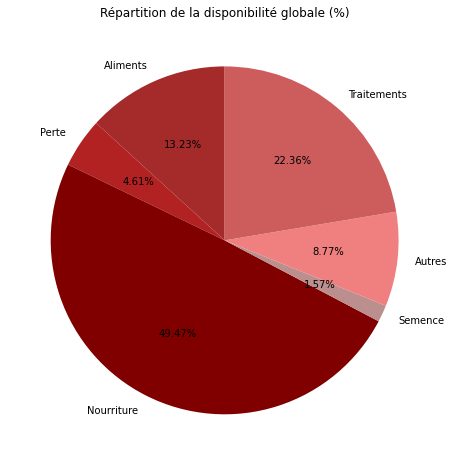

In [191]:
plt.figure(figsize=(12,8))
plt.title("Répartition de la disponibilité globale (%)")

labels = 'Aliments', 'Perte', 'Nourriture', 'Semence', 'Autres', 'Traitements'
colors = ['brown', 'firebrick', 'maroon', 'rosybrown','lightcoral','indianred']

DomesticAvailability = [Calc_part_animaux, 
                        Calc_part_pertes, 
                        Calc_part_nourriture, 
                        Calc_part_semences, 
                        Calc_part_autres, 
                        Calc_part_traitement]

plt.pie(DomesticAvailability, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.savefig('PieChart01.png')

 <a id='another_cell_2_e'></a>

*e. Use of domestic grain availability*

    → Grain list : Blé, Riz (Eq Blanchi), Orge, Maïs, Seigle, Avoine, Millet, Sorgho, Céréales, Autres

In [115]:
foodAvailabilityGrain = foodAvailability.loc[foodAvailability["Produit"].isin(
    ["Blé", 
     "Riz (Eq Blanchi)", 
     "Orge", 
     "Maïs", 
     "Seigle", 
     "Avoine", 
     "Millet", 
     "Sorgho", 
     "Céréales, Autres"])].copy()

In [116]:
foodAvailabilityGrain

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
15568,Îles Salomon,Maïs,vegetale,0.0,0.0,1.0,0.15,0.01,0.03,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
15575,Îles Salomon,Orge,vegetale,0.0,0.0,0.0,0.07,0.00,0.01,1.000000e+06,0.0,1.000000e+06,0.000000e+00,0.0,0.000000e+00,0.0,1000000.0,0.0
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12000000.0,623.0,63.76,1.36,10.90,4.900000e+07,0.0,4.700000e+07,3.600000e+07,1000000.0,3.000000e+06,0.0,0.0,0.0


- "Aliments pour animaux" on Domestic Grain Availability (%) :

In [117]:
Calc_part_animaux2 = round((foodAvailabilityGrain["Aliments pour animaux"].sum() / foodAvailabilityGrain["Disponibilité intérieure"].sum()) * 100,2)

In [118]:
print("La part des aliments destinée aux animaux dans la disponilité intérieure mondiale des céréales en 2017 est de", Calc_part_animaux2, "%")

La part des aliments destinée aux animaux dans la disponilité intérieure mondiale des céréales en 2017 est de 36.29 %


- "Pertes" on Domestic Grain Availability (%) :

In [119]:
Calc_part_pertes2 = round((foodAvailabilityGrain["Pertes"].sum() / foodAvailabilityGrain["Disponibilité intérieure"].sum()) * 100,2)

In [120]:
print("La part des aliments perdue dans la disponilité intérieure mondiale des céréales en 2017 est de", round(Calc_part_pertes2, 2), "%")

La part des aliments perdue dans la disponilité intérieure mondiale des céréales en 2017 est de 4.45 %


- "Nourriture" on Domestic Grain Availability (%) :

In [121]:
Calc_part_nourriture2 = round((foodAvailabilityGrain["Nourriture"].sum() / foodAvailabilityGrain["Disponibilité intérieure"].sum()) * 100,2)

In [122]:
print("La part des aliments destinée à l'alimentation humaine dans la disponilité intérieure mondiale des céréales en 2017 est de", round(Calc_part_nourriture2, 2), "%")

La part des aliments destinée à l'alimentation humaine dans la disponilité intérieure mondiale des céréales en 2017 est de 42.75 %


- "Semences" on Domestic Grain Availability (%) :

In [123]:
Calc_part_semences2 = round((foodAvailabilityGrain["Semences"].sum() / foodAvailabilityGrain["Disponibilité intérieure"].sum()) * 100,2)

In [124]:
print("La part des aliments destinée aux semences agricoles dans la disponilité intérieure mondiale des céréales en 2017 est de", round(Calc_part_semences2, 2), "%")

La part des aliments destinée aux semences agricoles dans la disponilité intérieure mondiale des céréales en 2017 est de 2.85 %


- "Autres Utilisations" on Domestic Grain Availability (%) :

In [125]:
Calc_part_autres2 = round((foodAvailabilityGrain["Autres Utilisations"].sum() / foodAvailabilityGrain["Disponibilité intérieure"].sum()) * 100,2)

In [126]:
print("La part des aliments destinée aux autres usages dans la disponilité intérieure mondiale des céréales en 2017 est de", round(Calc_part_autres2, 2), "%")

La part des aliments destinée aux autres usages dans la disponilité intérieure mondiale des céréales en 2017 est de 9.75 %


- "Traitement" on Domestic Grain Availability (%) :

In [127]:
Calc_part_traitement2 = round((foodAvailabilityGrain["Traitement"].sum() / foodAvailabilityGrain["Disponibilité intérieure"].sum()) * 100,2)

In [128]:
print("La part des aliments destinée aux traitements industriels dans la disponilité intérieure mondiale des céréales en 2017 est de", round(Calc_part_traitement2, 2), "%")

La part des aliments destinée aux traitements industriels dans la disponilité intérieure mondiale des céréales en 2017 est de 3.93 %


- Domestic grain availability repartition (%) :

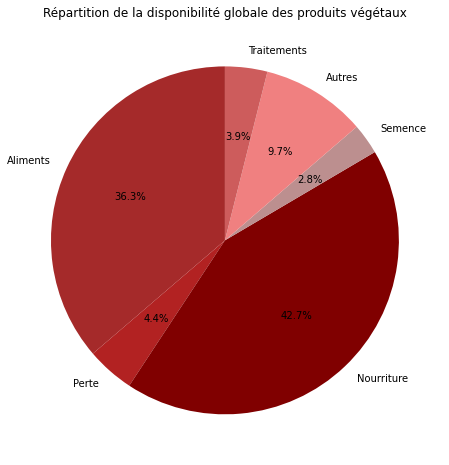

In [129]:
plt.figure(figsize=(12,8))
plt.title("Répartition de la disponibilité globale des produits végétaux")

labels = 'Aliments', 'Perte', 'Nourriture', 'Semence', 'Autres', 'Traitements'

colors = ['brown', 'firebrick', 'maroon', 'rosybrown','lightcoral','indianred']

DomesticGrainAvailability = [Calc_part_animaux2, 
                             Calc_part_pertes2, 
                             Calc_part_nourriture2, 
                             Calc_part_semences2, 
                             Calc_part_autres2, 
                             Calc_part_traitement2]

plt.pie(DomesticGrainAvailability, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.savefig('PieChart02.png')

 *6. the example of Thailand in the use of cassava (manioc) :*

- Undernutrition proportion in Thailand :

In [130]:
undernutritionAndPop2017 = pop2017.merge(undernutrition2017, on="Zone", how="inner")

In [131]:
undernutritionAndPop2017_Thailand = undernutritionAndPop2017.loc[undernutritionAndPop2017["Zone"].isin(["Thaïlande"])].copy()

In [132]:
undernutritionAndPop2017_Thailand

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale,Année,Valeur (en million d'hab),Valeur (en milliers d'hab)
183,Thaïlande,2017,69209.81,69.20981,69209810.0,2017,6.2,6200


In [133]:
Proportion_Undernutrition_Thailand = (undernutritionAndPop2017_Thailand["Valeur (en milliers d'hab)"] / undernutritionAndPop2017_Thailand["Population (en milliers d'hab)"]) * 100

In [134]:
Proportion_Undernutrition_Thailand = Proportion_Undernutrition_Thailand.astype(int)

In [135]:
print("La proportion de la population thaïlandaise souffrant de malnutrition est de : ", round(Proportion_Undernutrition_Thailand.sum(),2), "%")

La proportion de la population thaïlandaise souffrant de malnutrition est de :  8 %


- use of cassava (manioc) in Thailand :

    → Disponibilité intérieure = Production + Importations - Exportations + Variation de stock

In [136]:
foodAvailability_Manioc = foodAvailability.loc[foodAvailability["Produit"].isin(["Manioc"])].copy()

In [137]:
foodAvailability_Manioc_Thailand = foodAvailability_Manioc.loc[foodAvailability_Manioc["Zone"].isin(["Thaïlande"])].copy()

In [138]:
foodAvailability_Manioc_Thailand

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


- "Exportations" on cassava availability (%) :

In [139]:
Calc_part_exportations = round((foodAvailability_Manioc_Thailand["Exportations - Quantité"].sum() / foodAvailability_Manioc_Thailand["Production"].sum()) * 100,2)

In [140]:
print("La part du manioc destinée à l'exportation sur la production totale du manioc en 2017 en Thaïlande est de", Calc_part_exportations, "%")

La part du manioc destinée à l'exportation sur la production totale du manioc en 2017 en Thaïlande est de 83.41 %


*7. List of countries for which the proportion of undernourished people is the highest in 2017 :*

In [141]:
undernutritionAndPop2017

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale,Année,Valeur (en million d'hab),Valeur (en milliers d'hab)
0,Afghanistan,2017,36296.113,36.296113,36296113.0,2017,10.5,10500
1,Afrique du Sud,2017,57009.756,57.009756,57009756.0,2017,3.1,3100
2,Albanie,2017,2884.169,2.884169,2884169.0,2017,0.1,100
3,Algérie,2017,41389.189,41.389189,41389189.0,2017,1.3,1300
4,Allemagne,2017,82658.409,82.658409,82658409.0,2017,0.0,0
...,...,...,...,...,...,...,...,...
196,Venezuela (République bolivarienne du),2017,29402.484,29.402484,29402484.0,2017,8.0,8000
197,Viet Nam,2017,94600.648,94.600648,94600648.0,2017,6.5,6500
198,Yémen,2017,27834.819,27.834819,27834819.0,2017,0.0,0
199,Zambie,2017,16853.599,16.853599,16853599.0,2017,0.0,0


In [142]:
undernutritionAndPop2017["Proportion malnutrition"] = round((undernutritionAndPop2017["Valeur (en milliers d'hab)"] / undernutritionAndPop2017["Population (en milliers d'hab)"]) * 100,2)

In [143]:
undernutritionAndPop2017[["Zone", "Proportion malnutrition"]].sort_values(by=["Proportion malnutrition"], ascending=False).head(10)

,Zone,Proportion malnutrition
78,Haïti,48.26
157,République populaire démocratique de Corée,47.19
108,Madagascar,41.06
103,Libéria,38.28
100,Lesotho,38.25
182,Tchad,37.96
160,Rwanda,35.06
121,Mozambique,32.81
184,Timor-Leste,32.17
0,Afghanistan,28.93


*8. Those who have provided the most aid since 2013 :*

In [144]:
pop2017.head()

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale
4,Afghanistan,2017,36296.113,36.296113,36296113.0
10,Afrique du Sud,2017,57009.756,57.009756,57009756.0
16,Albanie,2017,2884.169,2.884169,2884169.0
22,Algérie,2017,41389.189,41.389189,41389189.0
28,Allemagne,2017,82658.409,82.658409,82658409.0


In [145]:
foodHelp.head()

,Pays bénéficiaire,Année,Produit,Valeur (en tonnes)
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [146]:
foodHelp.rename(columns = {'Pays bénéficiaire': 'Zone'}, inplace=True)

In [147]:
foodHelp.head()

,Zone,Année,Produit,Valeur (en tonnes)
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [148]:
foodHelpGroupByZone = foodHelp.groupby(by="Zone").sum()

In [149]:
foodHelpAndPop2017 = pop2017.merge(foodHelpGroupByZone, on="Zone", how="inner")

In [150]:
foodHelpAndPop2017.head()

,Zone,2017,Population (en milliers d'hab),Population (en million d'hab),Population totale,Année,Valeur (en tonnes)
0,Afghanistan,2017,36296.113,36.296113,36296113.0,32216,185452
1,Algérie,2017,41389.189,41.389189,41389189.0,78561,81114
2,Angola,2017,29816.766,29.816766,29816766.0,8054,5014
3,Bangladesh,2017,159685.424,159.685424,159685424.0,50347,348188
4,Bénin,2017,11175.198,11.175198,11175198.0,32229,22224


In [151]:
foodHelpAndPop2017[["Zone", "Valeur (en tonnes)"]].sort_values(by=["Valeur (en tonnes)"], ascending=False).head(10)

,Zone,Valeur (en tonnes)
52,République arabe syrienne,1858943
21,Éthiopie,1381294
72,Yémen,1206484
65,Soudan du Sud,695248
64,Soudan,669784
33,Kenya,552836
3,Bangladesh,348188
63,Somalie,292678
54,République démocratique du Congo,288502
47,Niger,276344


*9. Those with the most availability/inhabitant :*

In [152]:
foodAvailibilityKcalGroupByZone.head()

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087
Afrique du Sud,3020
Albanie,3188
Algérie,3293
Allemagne,3503


In [153]:
foodAvailibilityKcalGroupByZone.sort_values(by=["Disponibilité alimentaire (Kcal/personne/jour)"], ascending=False).head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770
Belgique,3737
Turquie,3708
États-Unis d'Amérique,3682
Israël,3610
Irlande,3602
Italie,3578
Luxembourg,3540
Égypte,3518


*9. Those with the least availability/inhabitant :*

In [154]:
foodAvailibilityKcalGroupByZone.sort_values(by=["Disponibilité alimentaire (Kcal/personne/jour)"], ascending=True).head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Chine,11
République centrafricaine,1879
Zambie,1924
Madagascar,2056
Afghanistan,2087
Haïti,2089
République populaire démocratique de Corée,2093
Tchad,2109
Zimbabwe,2113
